In [10]:
import os
import pandas as pd
import numpy as np
import preprocessing
import nltk
import doc2text

from nltk.corpus import stopwords
from rake_nltk import Rake
import yake

import matplotlib.pyplot as plt

In [11]:
stop = stopwords.words("english")
language = "en"
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')

In [12]:
dirpath = "/Users/braulioantonio/Documents/Python/Hazelnut/datasets/qmind_linkedin/"
files_dictionary = doc2text.get_files(dirpath)

corpus_data = []
for key in files_dictionary.keys():
    for file in files_dictionary[key]:
        file_metadata = doc2text.metadata(dirpath + file)
        corpus_data.append(doc2text.extract_text(dirpath+file, key) + file_metadata.all())

clean_corpus_data = [preprocessing.stdtextpreprocessing(element) for element in corpus_data]

In [13]:
# Extract title of project
titles = [text.partition("\n")[0] for text in corpus_data]
# Delete title from each element in data
for i in range(len(corpus_data)):
    corpus_data[i] = corpus_data[i].replace(titles[i], "")

# Create df
df = pd.DataFrame(list(zip(titles, corpus_data)),columns =['title', 'desc'])
# Create text column
df["text"] = df["title"] + " " + df["desc"]
# Display
#df
df["clean_text"] = df["text"].apply(preprocessing.stdtextpreprocessing)
#df = df[["title", "clean_text"]]

In [18]:
rake_nltk_var = Rake() #model to extract phrases/keywords

rake_nltk_var.extract_keywords_from_text(df["clean_text"][2])
keyword_extracted = rake_nltk_var.get_ranked_phrases()[:8] #long sentences here"""

In [19]:

kw_extractor = yake.KeywordExtractor()

max_ngram_size = 2
deduplication_threshold = 0.9
numOfKeywords = 1
custom_kw_extractor = yake.KeywordExtractor(lan=language, n=max_ngram_size, dedupLim=deduplication_threshold, top=numOfKeywords, features=None)


tokenized_sentences = []
tags = []
for text in keyword_extracted:
    #text = keyword_extracted[0] #I need to iterate this one
    sentences = nltk.sent_tokenize(text)
    #tokenized_sentences = [nltk.word_tokenize(sent) for sent in sentences]
    tokenized_sentences.append([nltk.word_tokenize(sent) for sent in sentences][0]) #in the future there might be more than one sentence here
    #text = keyword_extracted[0] I could replace this with name extraction
    #keywords = custom_kw_extractor.extract_keywords(text)
    tags.append(custom_kw_extractor.extract_keywords(text)[0][0])

### Applying the model

In [20]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
model = Doc2Vec.load(os.getcwd() + '/hazelnut_model') 
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, learning_rate='auto',init='random')

In [21]:
proj2vec = [model.infer_vector(token) for token in tokenized_sentences]
proj2vec = np.asarray(proj2vec)
# Visualize Vectors
#tsne.fit_transform(proj2vec)
#proj2vec.shape



In [22]:
#proj2vec = model.infer_vector(tokenized_sentences[0]) 

In [23]:
x = tsne.fit_transform(proj2vec)[:,0]
y = tsne.fit_transform(proj2vec)[:,1]

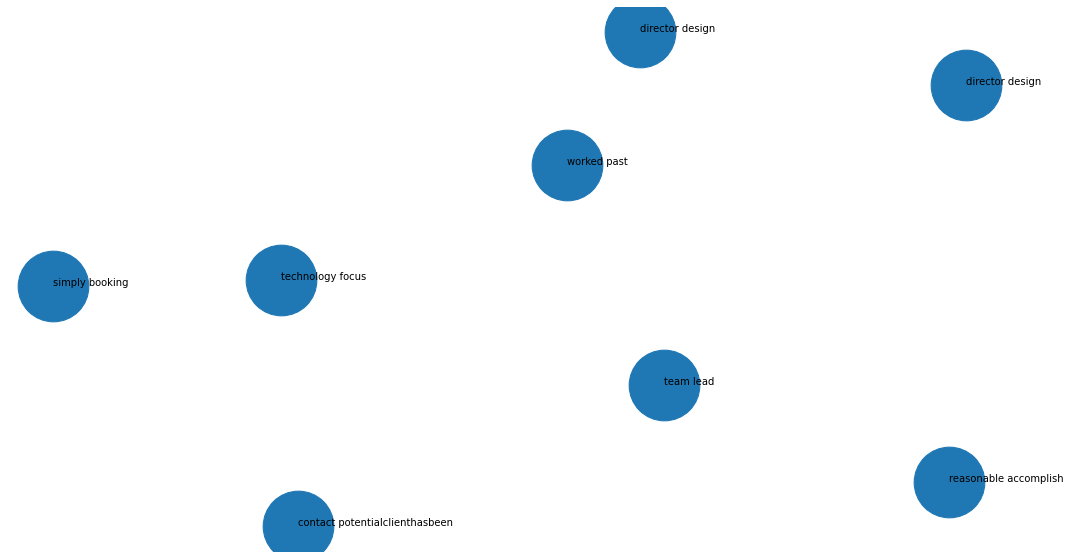

In [24]:
fig, ax = plt.subplots()
fig.set_size_inches(18,10) 
ax.scatter(x, y, s=5000)
ax.set_axis_off()

for i, txt in enumerate(tags):
    ax.annotate(txt, (x[i], y[i]), size = 10)
fig.savefig('/Users/braulioantonio/Documents/Python/Hazelnut/demo.png')

### attempt to get names

In [101]:
names = preprocessing.extract_names(corpus_data[0])
emails = preprocessing.extract_names(corpus_data[0])
#names

In [90]:
#stop = stopwords.words('english')
#document = " ".join([i for i in clean_corpus_data[0].split() if i not in stop])
#sentences = nltk.sent_tokenize(document)
#sentences = [nltk.word_tokenize(sent) for sent in sentences]
#sentences = [nltk.pos_tag(sent) for sent in sentences]
## this might go in preprocessing

### Attempt to get key words

In [102]:
#!pip install yake
import yake
kw_extractor = yake.KeywordExtractor()

In [106]:
text = corpus_data[2]
language = "en"

max_ngram_size = 3
deduplication_threshold = 0.3
numOfKeywords = 15

custom_kw_extractor = yake.KeywordExtractor(lan=language, n=max_ngram_size, dedupLim=deduplication_threshold, top=numOfKeywords, features=None)
keywords = custom_kw_extractor.extract_keywords(text)
for kw in keywords:
    print(kw)

('QMIND Design Directors', 0.0034087743786865242)
('Design', 0.003803367620959844)
('model', 0.006026683858421884)
('Data', 0.01037179048069565)
('Hospital', 0.01494021983163719)
('QMIND', 0.015431246177648761)
('team', 0.016851979147917674)
('Project', 0.018328737124292532)
('neural network', 0.02143876288483478)
('learning', 0.024469086009800935)
('Human', 0.024762152836234168)
('work', 0.02477571025298345)
('Apple Watch Data', 0.03007656525869324)
('accuracy', 0.03075747031564878)
('Information', 0.031181533435243623)


In [107]:
from rake_nltk import Rake

In [108]:
rake_nltk_var = Rake()
text = clean_corpus_data[0]

rake_nltk_var.extract_keywords_from_text(text)
keyword_extracted = rake_nltk_var.get_ranked_phrases()[:5]
print(keyword_extracted)

['look forward meeting team member diving deeper project month meanwhile great time past weekend attending camp qmind two day onboarding event design team member learned lot got inspired speaker fellow colleague workshop excellent platform beginner understand basic computer based model working datasets ml algorithm big shoutout tomax bennett sydney corbettand team organizing event really tuned mindset changing world ai ai dataengineering healthcare see', 'top form bottom form natela urushadzeout network rd ac coordinator tbilisi youth palace w qmind follower mo day left apply qmind director year check last year qmind director travis cossariniandtania sidhom say experience role theyve gained member director team great opportunity gain unbelievable leadership experience undergraduate level work alongside extremely talented driven student industry professional cutting edge tech field dont miss', 'qmind follower mo edited interested learning ai shape future rapidly advancing technology key

## Applying the models and plotting

In [9]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
model = Doc2Vec.load(os.getcwd() + '/hazelnut_model') 


In [ ]:
proj2vec = [model.infer_vector((df['clean_text'][i].split(' '))) for i in range(0,len(df['clean_text']))]
# Display
#proj2vec
df['proj2vec'] = np.array(proj2vec).tolist()
# Display
#df

In [ ]:
tsne.fit_transform(X)

In [ ]:
#df["clean_text"][0]
#document = " ".join([i for i in clean_corpus_data[0].split() if i not in stop])
#sentences = nltk.sent_tokenize(document)
#sentences = [nltk.word_tokenize(sent) for sent in sentences]
#len(keyword_extracted)
#print(keyword_extracted)
#document = " ".join([i for i in keyword_extracted[0].split() if i not in stop])
